In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### standard deviation - :
a quantity expressing by how much the members of a group differ from the mean value for the group.

In [45]:
arr = np.random.randn(10) +  10

In [46]:
arr

array([ 9.11815514,  8.45820735, 10.17642642,  9.59178893, 10.32849307,
       12.28075559,  8.49202026, 10.41626348,  9.801903  , 10.87658328])

In [47]:
std = np.std(arr)

In [48]:
std

1.0906926670592116

In [49]:
x = np.random.randn(50)
e = np.random.randn(50) # gaussian noise
y = 2*x + 5 + 0.4*e 

print(x)
print(y)

[-0.58484891 -0.1175054  -0.16072138  2.0359758  -1.33007561 -1.28610856
  0.3523754   0.56357439  0.05876796  0.6259342  -1.43196748  0.26636838
  0.11771131 -1.02647002  0.44938193 -1.09955651 -0.28018909  1.44593714
 -1.55250469  0.68035482  1.67105723  0.39237544 -1.17992618  0.31348715
 -0.54111762  0.71227273  2.47087392 -0.4538955  -0.2869192   0.2428957
 -0.14669501  2.37835142 -1.1392872  -1.46624644 -0.56537695 -0.26800189
  0.5454226  -0.12802009 -1.53383115 -0.39578638  1.16797689 -0.81247148
  0.98488851 -0.35914197 -0.41819329 -0.70592197 -0.77352199  0.11391438
 -0.94648078  1.30079749]
[ 3.44112208  4.88802733  4.95237921  8.71303912  3.02938095  2.88405743
  5.96940413  6.20770735  5.53965193  6.08255423  1.69189676  5.74698996
  5.16088899  2.93290015  6.60218162  2.72016649  4.30565863  8.09542693
  2.31030329  6.48465033  7.88446195  4.60208339  2.56291853  6.19205342
  3.67369758  5.97678558  9.95818514  4.40094514  4.41237466  5.23536492
  4.67957001 10.07746735  

In [50]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print(x_mean, y_mean)

-0.042001759315592316 4.950725630117415


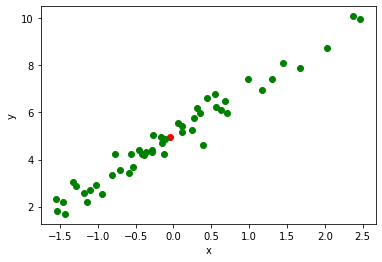

In [51]:
plt.scatter(x_mean, y_mean, color = "red")
plt.scatter(x, y, color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [52]:
sx = np.std(x)
sy = np.std(y)

In [53]:
r = np.corrcoef(x, y)
r = r[0][1]

In [54]:
slope = (sy/sx)*r

In [55]:
x_reg = np.arange(start = x_mean , step = 1, stop = max(y))

In [56]:
x_reg

array([-0.04200176,  0.95799824,  1.95799824,  2.95799824,  3.95799824,
        4.95799824,  5.95799824,  6.95799824,  7.95799824,  8.95799824,
        9.95799824])

In [57]:
y_reg = x_reg + slope

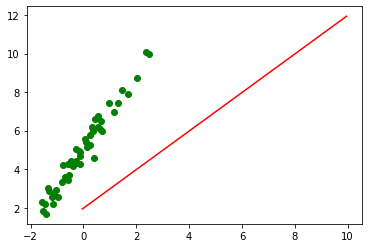

In [58]:
plt.scatter(x, y, color = 'green')
plt.plot(x_reg, y_reg, color = "red")

# Linear  Regeression
### gradient descent algorithm
gradient descent algorithm is based upon minimizing the total error.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preparing Data

In [60]:
x = np.random.randn(100) # standared normal distribution
g_err = np.random.randn(100) # gaussian error
y = 2*x + 0.6*g_err

### visualization and normalizing data

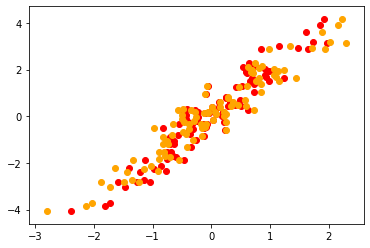

In [61]:
plt.scatter(x, y, color = "red")
X = ((x - np.mean(x))/np.std(x))   # normal standard distribution
Y = y
plt.scatter(X, Y, color = "orange")
plt.show()

In [62]:
"{:f}".format(float(np.mean(X))) 

'-0.000000'

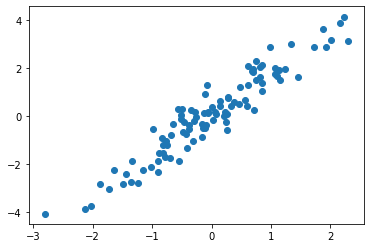

In [63]:
plt.scatter(X, Y);

### now we have to fit a line in the above training data (X, Y) 
###### we will do that by minimizing the error and this algorithm is called gradient descent

## Gradient Descent Algorithm
- Start with random theta
- Update the theta as per update <br>
   - Repeat step 2 until convergance

In [64]:
# hyptothesis function or regression line
def line_hypothesis(x, theta):
    return theta[0] + theta[1]*x

# calculating total error
def err(X, Y, theta):
    m = X.shape[0]
    e = 0 # initial error value
    for i in range(m):
        hx = line_hypothesis(X[i], theta)
        e += (hx - Y[i])**2    
    return  e

def gradient(X, Y, theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = line_hypothesis(X[i], theta)
        grad[0] += hx - Y[i]
        grad[1] += (hx - Y[i])*X[i]
    return grad

# gradient descent function
def gradient_descent(X, Y, learning_rate = 0.001):
    theta = np.zeros((2,))
    error_list = []
    for i in range(100):
        grad = gradient(X, Y, theta)
        e = err(X, Y, theta)
        error_list.append(e)
        theta[0]  = theta[0] - learning_rate*grad[0]
        theta[1]  = theta[1]  - learning_rate*grad[1]

    return error_list, theta
    
    
    
    

In [65]:
error_list, final_theta = gradient_descent(X, Y)

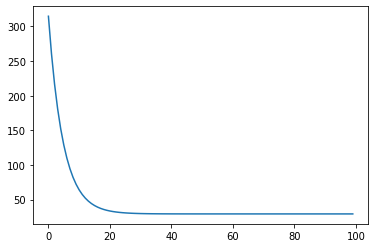

In [66]:
plt.plot(error_list);

In [67]:
test = np.linspace(-4, 4, 12)

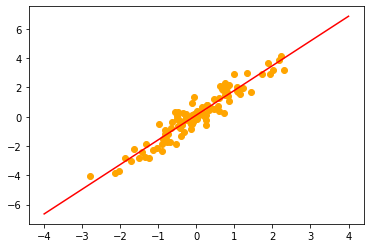

In [68]:
plt.plot(test, line_hypothesis(test, final_theta), color = "red")
plt.scatter(X, Y, color = "orange");

### Different Method

In [69]:
x_mean = np.mean(X)
y_mean = np.mean(Y)
sx = np.std(X)
sy = np.std(Y)

In [70]:
x_mean

-4.440892098500626e-18

In [71]:
m = X.shape[0]
sigma = 0
for i in range(m):
    sigma += ((X[i]  - x_mean)*(Y[i] - y_mean))/sx*sy 
    

In [72]:
sigma

298.4333005395588

In [73]:
r = sigma/ (m - 1)

In [74]:
slope =  r*sy/sx

In [75]:
y_intercept = y_mean - slope*x_mean

In [76]:
final_theta[0]

0.10801904401678816

In [77]:
y_intercept

0.1080219132299141

In [78]:
final_theta[0]

0.10801904401678816

In [79]:
sum(y)

10.8021913229914

In [80]:
y_intercept

theta  = np.zeros((2, ))
theta[0] = y_intercept
theta[1] = slope

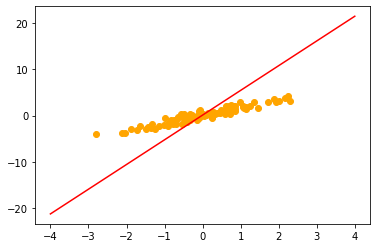

In [81]:
plt.plot(test, line_hypothesis(test, theta), color = "red")
plt.scatter(X, Y, color = "orange");

In [82]:
np.mean(x)

0.006075407557482446

In [83]:
new_x = X*np.std(x) + np.mean(x) # normal standard distribution


In [84]:
np.std(x)

0.8538986532407823

In [85]:
new_x

array([ 0.40058578,  1.8508691 , -0.66245247, -1.27073084, -1.5971608 ,
        0.91184059,  1.15297149,  0.28892772, -0.32380209, -0.31603743,
        0.41166871, -0.22942655, -0.97586031, -2.39157402, -1.21956523,
       -0.26722476, -0.05298483, -0.13852203, -0.08322818, -0.10176489,
        0.60706141,  1.96643749,  0.98636544,  0.72630507,  0.58665711,
       -0.70101489,  1.72741661,  0.52482278, -0.47729686, -1.14884629,
       -0.75080918, -0.59642467, -1.72715877,  0.72919623, -1.13393366,
        0.49150173,  0.69773284,  0.2211765 , -0.39344004,  0.05446369,
        0.84831294,  0.18765268, -1.46466226,  1.61052952, -0.76647281,
        0.02641359,  0.64664116, -0.42821049, -0.83261645,  0.94004948,
       -1.05193754,  1.06031343, -0.41182339, -1.40211756, -0.68478065,
       -0.22315363,  0.19447703, -0.64498111,  0.53462187,  1.91528835,
        0.1342211 , -0.6309725 , -0.08381031, -0.36427563,  0.3237121 ,
       -0.04425921, -0.25199462,  0.24493633,  1.65442042, -0.69

In [86]:
x

array([ 0.40058578,  1.8508691 , -0.66245247, -1.27073084, -1.5971608 ,
        0.91184059,  1.15297149,  0.28892772, -0.32380209, -0.31603743,
        0.41166871, -0.22942655, -0.97586031, -2.39157402, -1.21956523,
       -0.26722476, -0.05298483, -0.13852203, -0.08322818, -0.10176489,
        0.60706141,  1.96643749,  0.98636544,  0.72630507,  0.58665711,
       -0.70101489,  1.72741661,  0.52482278, -0.47729686, -1.14884629,
       -0.75080918, -0.59642467, -1.72715877,  0.72919623, -1.13393366,
        0.49150173,  0.69773284,  0.2211765 , -0.39344004,  0.05446369,
        0.84831294,  0.18765268, -1.46466226,  1.61052952, -0.76647281,
        0.02641359,  0.64664116, -0.42821049, -0.83261645,  0.94004948,
       -1.05193754,  1.06031343, -0.41182339, -1.40211756, -0.68478065,
       -0.22315363,  0.19447703, -0.64498111,  0.53462187,  1.91528835,
        0.1342211 , -0.6309725 , -0.08381031, -0.36427563,  0.3237121 ,
       -0.04425921, -0.25199462,  0.24493633,  1.65442042, -0.69